In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
Default = pd.read_csv('R:/datasets/Default.csv')

Default.head()

,default,student,balance,income
0,No,No,729.53,44361.63
1,No,Yes,817.18,12106.13
2,No,No,1073.55,31767.14
3,No,No,529.25,35704.49
4,No,No,785.66,38463.50


In [3]:
Default.shape

(10000, 4)

In [4]:
Default.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374877,33516.981852
std,483.714957,13336.639582
min,0.000000,771.970000
25%,481.732500,21340.460000
50%,823.635000,34552.645000
75%,1166.305000,43807.730000
max,2654.320000,73554.230000


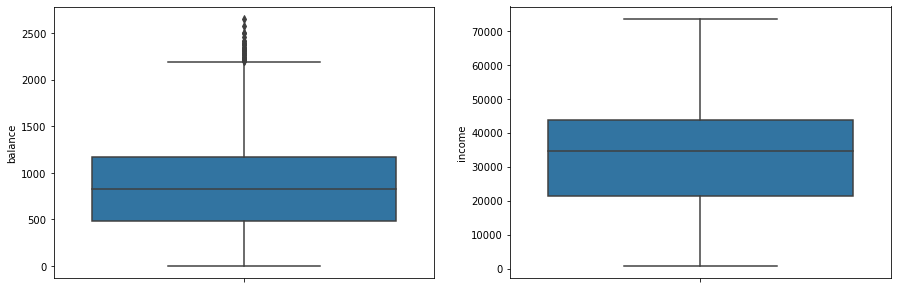

In [5]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(y = Default['balance'])

plt.subplot(1,2,2)
sns.boxplot(y = Default['income'])
plt.show()

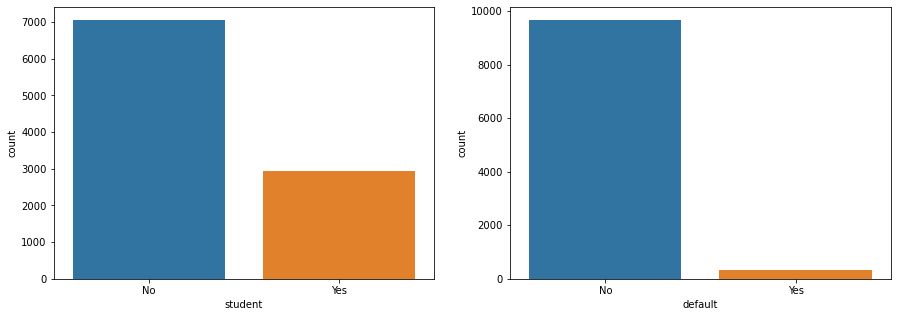

In [6]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.countplot(Default['student'])

plt.subplot(1,2,2)
sns.countplot(Default['default'])
plt.show()

In [7]:
Default["student"].value_counts()

No     7056
Yes    2944
Name: student, dtype: int64

In [8]:
Default["default"].value_counts()

No     9667
Yes     333
Name: default, dtype: int64

In [9]:
Default["student"].value_counts(normalize=True)

No     0.7056
Yes    0.2944
Name: student, dtype: float64

In [10]:
Default["default"].value_counts(normalize = True)

No     0.9667
Yes    0.0333
Name: default, dtype: float64

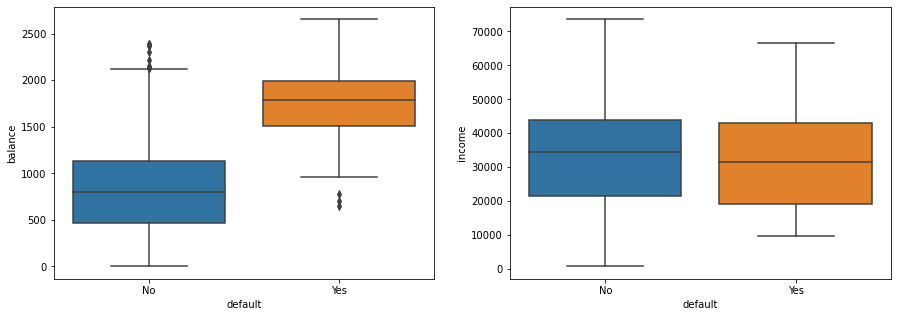

In [11]:
plt.figure(figsize = (15, 5))
plt.subplot(1,2,1)
sns.boxplot(Default['default'], Default['balance'])

plt.subplot(1,2,2)
sns.boxplot(Default['default'], Default['income'])
plt.show()

In [12]:
pd.crosstab(Default['student'], Default['default'], normalize = 'index').round(2)

default,No,Yes
student,,
No,0.97,0.03
Yes,0.96,0.04


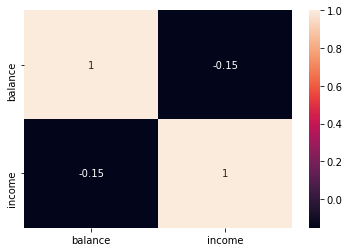

In [13]:
sns.heatmap(Default[['balance', 'income']].corr(), annot = True)
plt.show()

In [14]:
Default.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

In [15]:
Q1, Q3 = Default['balance'].quantile([.25, .75])
IQR = Q3 - Q1
LL = Q1 - 1.5*(IQR)
UL = Q3 + 1.5*(IQR)

In [16]:
df = Default[Default['balance'] > UL]

In [17]:
df['default'].count()

31

In [18]:
df['default'].value_counts(normalize = True)

Yes    0.83871
No     0.16129
Name: default, dtype: float64

In [19]:
df['default'].value_counts()

Yes    26
No      5
Name: default, dtype: int64

In [20]:
Default['balance'] = np.where(Default['balance'] > UL, UL, Default['balance'] )

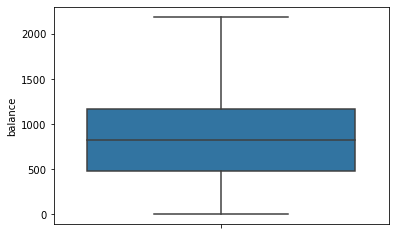

In [21]:
sns.boxplot(y = Default['balance'])
plt.show()

In [22]:
Default = pd.get_dummies(Default, drop_first = True)

In [23]:
Default.head()

,balance,income,default_Yes,student_Yes
0,729.53,44361.63,0,0
1,817.18,12106.13,0,1
2,1073.55,31767.14,0,0
3,529.25,35704.49,0,0
4,785.66,38463.50,0,0


In [24]:
Default.columns = ['balance', 'income', 'default', 'student']

In [25]:
Default.head()

,balance,income,default,student
0,729.53,44361.63,0,0
1,817.18,12106.13,0,1
2,1073.55,31767.14,0,0
3,529.25,35704.49,0,0
4,785.66,38463.50,0,0


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = Default.drop('default', axis = 1)
y = Default['default']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21, stratify = y)

In [29]:
print(X_train.shape)
print(X_test.shape)

(7000, 3)
(3000, 3)


In [30]:
print(y_train.value_counts(normalize = True).round(2))
print(' ')
print(y_test.value_counts(normalize = True).round(2))

0    0.97
1    0.03
Name: default, dtype: float64
 
0    0.97
1    0.03
Name: default, dtype: float64


In [33]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=33, sampling_strategy = 0.75)
X_res, y_res = sm.fit_sample(X_train, y_train)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
lr = LogisticRegression()

In [36]:
lr.fit(X_res,y_res)

LogisticRegression()

In [37]:
y_pred=lr.predict(X_test)

In [38]:
from sklearn.metrics import confusion_matrix, classification_report

In [39]:
confusion_matrix(y_test,y_pred)

array([[2589,  311],
       [  25,   75]], dtype=int64)